<div align="right">
<table style="width:50%">
  <tr>
    <th>Hazırlayan</th>
    <th>Versiyon</th> 
    <th>Tarih</th> 
    <th>Dil</th>
  </tr>
  <tr>
    <td>dataFLOYD</td>
    <td>v1.00</td> 
    <td>08 Eyl 2018</td>
    <td>TR </td>
  </tr>
</table>
</div>

<div class="alert alert-danger">
<br>
Ön koşullar ile ilgili bilgi vererek başlanmalı, böylece okuyanlar ilk önce eksiklerini tamamlayabilir. <br>
<br>
ÖN KOŞULLAR
    <br><a href="https://www.datafloyd.com/tr/veri-bilimi-icin-temel-python-kullanimi/">Temel Python kullanımı</a>
    <br><a href="https://www.datafloyd.com/tr/pyhton-numpy-kutuphanesinin-kullanimi/">Numpy kütüphanesi kullanımı</a>
        <br><a href="https://www.datafloyd.com/tr/pyhton-matplotlib-kutuphanesini-kullanarak-veri-gorsellestirme-temel-grafikler%C2%B6/">Python “matplotlib” kütüphanesini kullanarak temel görselleştirme</a>
</div>

# PCA (PRINCIPAL COMPONENT ANALYSIS)

<div class="well">
Makine öğrenmesinden yolu geçmiş hemen hemen herkes PCA (Principal Component Analysis) terimini duymuştur. Yeni başlayanlar için kafada canlandırması, anlaşılması çok kolay değildir. "Eigenvector", "covariance matrix" gibi konseptlerle içli dışlıdır. Bir de ben anlatmayı deneyeyim belki olur :)
</div>

Öncelikle üzerinde çalışabileceğimiz veriye ihtiyacımız var. Görselleştirme ayağı da olacağı için verimiz 2 boyutlu olacak. [**Lineer regresyon**](https://www.datafloyd.com/tr/veri-biliminin-temelleri-dogrusal-regresyona-giris/) yazımızdaki yöntemi kullanarak veri üretelim.

In [14]:
# Şekiller standart ve güzel görünsün. 
# Jupyter notebook'ta açınca da "zoom" yeteneğimiz olsun
%matplotlib notebook

Burada çeşitli kütüphaneleri ekliyoruz.

In [15]:
# Numpy nümerik hesap kütüphanesi
import numpy as np

# Matplotlib grafik çizim kütüphanesi
import matplotlib.pyplot as plt
# Seaborn dark theme iyidir :)
import seaborn as sns
sns.set_style("darkgrid")

# Özel paketimizden de biraz ekleyelim
import sys
sys.path.append("..")
from datafloyd.data import generate_noisy_line

Sentetik veri yaratacağız sakin olun hala PCA kısmına geçmedik :)

<IPython.core.display.Javascript object>


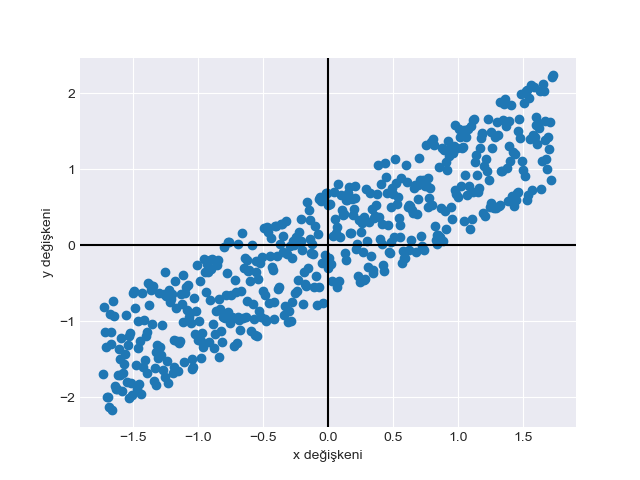

In [16]:
# gürültülü bir çizgi yaratalım
x,y=generate_noisy_line(y_noise=5,x=np.linspace(-10,10,500),random_seed=42)
# x ve y değişkenlerini bütünleşik vektör haline getiriyoruz
X = np.vstack([x,y]).T

# PCA öncesi veriyi normalize etmemiz lazım
# Bunun için ortalamayı çıkarıp standart sapmaya bölüyoruz
# axis=0 yapmamızın sebebi 2 boyutlu bir vektör elde etmek
X = (X - X.mean(axis=0))/X.std(axis=0)

plt.figure()
# Şimdi bunları basitçe çizdirelim
plt.scatter(X[:,0], X[:,1])
plt.xlabel("x değişkeni")
plt.ylabel("y değişkeni")

# x=0 ve y=0 eksenlerini çizelim
plt.axhline(0, color='black')
plt.axvline(0, color='black');

Veriden gördüğümüz gibi bu iki değişkenin arasında çok net bir şekilde ilişki var değil mi? Yani sanki eğik bir çizgi çizsek noktalar arasına "cuk" oturacak. 

**İşte bu "cuk" diye oturan çizgi aslında bizim "principal component" adını verdiğimiz şey.** Aynı zamanda bunlara "eigenvector" de denilmektedir. Bu çizgiyi bulalım hep birlikte. Bunun için hazır fonksiyonları kullanacağız. 

*İlerleyen günlerde hazır olmayan fonksiyonlarla bunu nasıl yapabileceğimizi anlattığım ve içinde biraz matematik bulunan bir yazı hazırlamayı da düşünüyorum. Unutursam hatırlatın lütfen :)*

In [17]:
# PCA sklearn.decomposition paketinin altında bulunuyor
from sklearn.decomposition import PCA

In [19]:
# Bir PCA sınıfı yaratalım
pca = PCA(n_components = 2)
pca.fit(X);

Bitti bile PCA yapmak işte bu kadar kolay! 

**PCA'de üzerinde duracağımız iki önemli bileşen var.** Bunlar scikit-learn'de aşağıdaki şekilde isimlendirilmiş:
* components: Bunlar bizim "principal component", kısaca PC vektörlerimiz. 
* explained_variance: Bu da her bir PC'nin varyansı. Bu değerin göreceli olarak büyük olması PC'nin önemli olduğunu göstermektedir.

**PC vektörlerini görelim** 

In [20]:
print(pca.components_)

[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]


Bu vektörlerin en önemli özelliği **birbirine dik olmasıdır.**

Bir de **"explained variance"** kısmına bakalım 

In [21]:
# PCA vektörlerin varyanslarını görelim
print(pca.explained_variance_)

[1.89754542 0.1064626 ]


Gördüğünüz gibi iki değer arasında oldukça büyük bir fark var. Bunun sebebi verinin ilk PC boyunca "yoğunlaşması" veya bu PC üzerinde varyansının fazla olması diyebiliriz. 

"Explained variance" değişkeninin yanında bir de bunun oransal olarak verildiği bir değişken mevcut. Çoğu zaman bunu toplam grafik ve bar grafik olarak görmek veri hakkında yerinde yorum yapabilmemizi sağlar. Haydi bunu da çizdirelim!

<IPython.core.display.Javascript object>


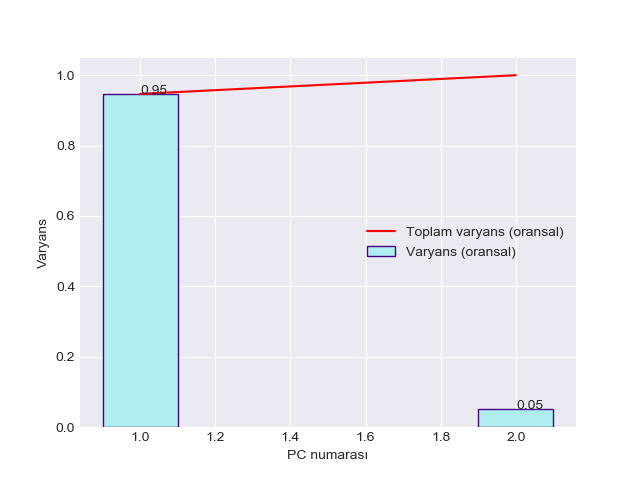

In [23]:
plt.figure()
plt.bar([1,2],pca.explained_variance_ratio_,width=0.2,color="paleturquoise",edgecolor="indigo")
plt.plot([1,2],np.cumsum(pca.explained_variance_ratio_),'r')
plt.text(1,pca.explained_variance_ratio_[0],s="%.2f" % pca.explained_variance_ratio_[0]);
plt.text(2,pca.explained_variance_ratio_[1],s="%.2f" % pca.explained_variance_ratio_[1]);
plt.xlabel("PC numarası")
plt.ylabel("Varyans")
plt.legend(["Toplam varyans (oransal)","Varyans (oransal)"]);

Yani toplam varyansın %95'inden ilk PC sorumlu. **Bu ilk PC'yi kullanarak verinin %95'ini ifade edebiliriz demekle hemen hemen aynı şey**

Biraz eğlenelim ve bu vektörleri veri üzerinde görselleştirelim. Aşağıdaki kodun anlamadığınız kısmı olursa endişe etmeyin ben bile yarın baksam durup düşünürüm :)

<IPython.core.display.Javascript object>


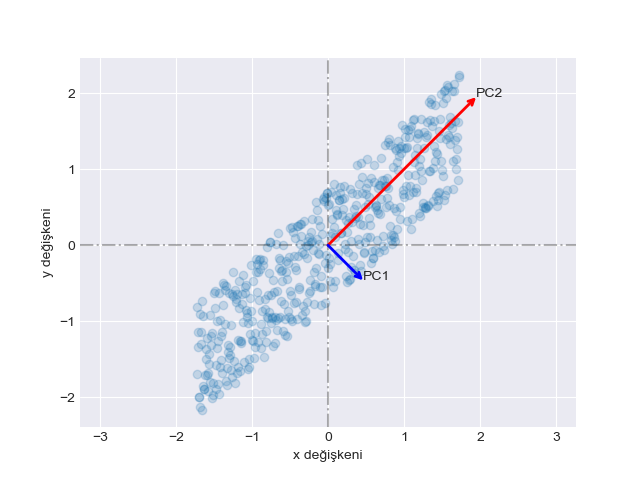

In [24]:
# Önce veriyi çizdirelim ama biraz transparan olsun
# Şimdi bunları basitçe çizdirelim
plt.figure()
plt.scatter(X[:,0], X[:,1],alpha=0.2)
plt.xlabel("x değişkeni")
plt.ylabel("y değişkeni")

# x=0 ve y=0 eksenlerini çizelim
plt.axhline(0, color='black',ls="-.",alpha=0.3)
plt.axvline(0, color='black',ls="-.",alpha=0.3);

# Anotasyon kullanarak "principal component"leriçizdirelim
v0 = pca.mean_
v1 = pca.mean_ + (pca.components_[0])*(np.sqrt(pca.explained_variance_[0])*2)
arrowprops=dict(arrowstyle='<-',
                linewidth=2,
               shrinkA=0, shrinkB=0,color='r');
plt.annotate('', v0, v1, arrowprops=arrowprops);
plt.text(v1[0],v1[1],"PC2")

v0 = pca.mean_
v1 = pca.mean_ + (pca.components_[1])*(np.sqrt(pca.explained_variance_[1])*2)
arrowprops=dict(arrowstyle='<-',
                linewidth=2,shrinkA=0, shrinkB=0,color='b')
plt.annotate('', v0, v1, arrowprops=arrowprops);
plt.text(v1[0],v1[1],"PC1")

# Eksenleri eşit göstermemiz önemli !!!
# Yoksa PC'lerin birbirine dik olduğunu şekilden anlayamazsınız !!!
plt.axis("equal");



Şekildeki PC'ler varyanslarına göre ölçeklendirilmiştir. Verinin büyük çoğunluğunun PC1'de olduğunu görebiliyoruz.

**PC'ler birbirine diktir demiştik.** Teyit etmek için bunların iç çarpımını (dot product) alalım. Bunun 0 çıkmasını bekliyoruz. 

In [25]:
np.dot(pca.components_[1],pca.components_[0])

0.0

Evet beklediğimiz gibi iki PC birbirine dik. 

**PCA bize lineer bir dönüşüm sağlamaktadır.** İsterseniz bu dönüşümü veri üzerinde ve PC'ler kullanalım ve ne olacağına bakalım. Bunu scikit-learn'deki transform fonksiyonunu kullanarak kolaylıkla yapabiliriz.

In [26]:
X_new = pca.transform(X)
pc_new = pca.transform(pca.components_)

<IPython.core.display.Javascript object>


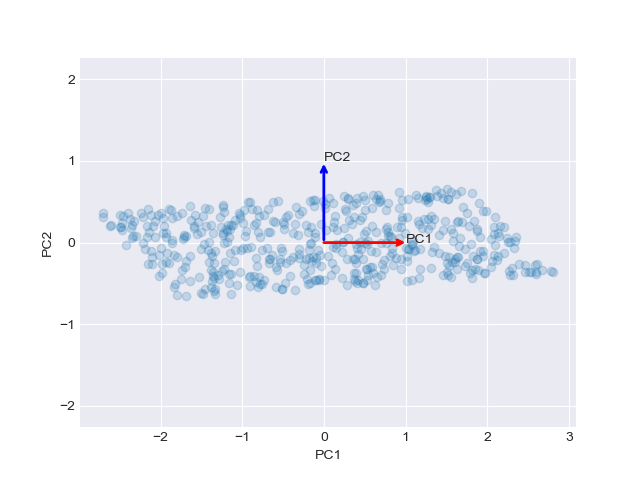

In [27]:
plt.figure()
plt.scatter(X_new[:,0], X_new[:,1],alpha=0.2)
plt.xlabel("PC1")
plt.ylabel("PC2")

mean_new = X_new.mean(axis=0)

# Anotasyon kullanarak "principal component"leriçizdirelim
v0 = mean_new
v1 = mean_new + pc_new[0]
arrowprops=dict(arrowstyle='<-',
                linewidth=2,
               shrinkA=0, shrinkB=0,color='r');
plt.annotate('', v0, v1, arrowprops=arrowprops);
plt.text(v1[0],v1[1],"PC1")

v0 = mean_new
v1 = np.round(mean_new + pc_new[1])

arrowprops=dict(arrowstyle='<-',
                linewidth=2,color='b')
plt.annotate('', v0, v1, arrowprops=arrowprops,);
plt.text(v1[0],v1[1],"PC2")

# Eksenleri eşit göstermemiz önemli !!!
# Yoksa PC'lerin birbirine dik olduğunu şekilden anlayamazsınız !!!
plt.axis("equal");

**PC'ler gördüğünüz gibi birim vektör (unit vector) halini aldı ve verimiz PC'ler uyarınca döndürülmüş oldu.**

Az önce yukarıda PC1'in üzerine veriyi yansıttığımızda %95 oranında varyansı sağlayabileceğimizden bahsetmiştik. Verinin yansıtılmış halini de görelim ve yazımızı bitirelim yavaştan..

<IPython.core.display.Javascript object>


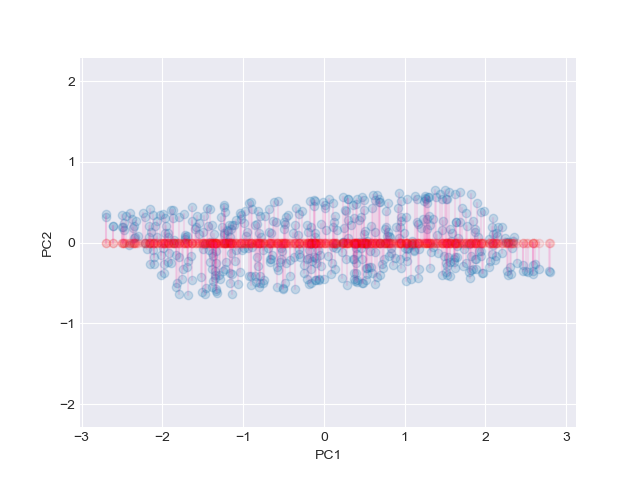

In [13]:
plt.figure()
plt.scatter(X_new[:,0], X_new[:,1],alpha=0.2)
# ilk eksende PC1 olduğu için 
plt.scatter(X_new[:,0],np.zeros(X_new[:,0].shape),alpha=0.1,color='r')

# Projeksiyon çizgilerini de çizdirelim
for i in range(len(X_new[:,0])):
    plt.plot([X_new[i,0],X_new[i,0]],[X_new[i,1],0],color="deeppink",alpha=0.1)

plt.xlabel("PC1")
plt.ylabel("PC2")

plt.axis("equal");

**Yukarıdaki şekilde kırmızı ile gördüğünüz noktalar verinin PC1 eksenine yansıtılmış hali.** Bu haliyle bile %95 oranında veri özelliği korunmakta. Oldukça iyi değil mi? Bir sonraki yazımızda görüşmek üzere...